NOTE: When referencing episodes of the show, shorthand may be used (e.g., S3E7 is Season 3 Episode 7).

# Word Clouds

It could be interesting to see a word cloud of popular words per character (for a handful of characters). 

In [25]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from requests import get
from bs4 import BeautifulSoup
import time
import random

In [32]:
def create_episode_titles():
    url = 'https://en.wikipedia.org/wiki/List_of_Lost_episodes'
    response = get(url)
    html_soup = BeautifulSoup(response.text, 'html.parser')
    containers = html_soup.find_all('td', 'summary')
    
    raw_titles = [title.text[1:-1] for title in containers[:114]]
    transcript_titles = [title.replace(' (',', ').replace(')','').replace(' ','_').replace('&','%26') if '(' in title else title.replace(' ','_').replace('?','%3F') for title in raw_titles]

    return transcript_titles

In [33]:
def get_episode_title(season_num, episode_num, transcript_titles):
    if season_num == 1:
        transcript_title = transcript_titles[episode_num-1]
    elif season_num == 2:
        transcript_title = transcript_titles[24+episode_num-1]
    elif season_num == 3:
        transcript_title = transcript_titles[24+23+episode_num-1]
    elif season_num == 4:
        transcript_title = transcript_titles[24+23+22+episode_num-1]
    elif season_num == 5:
        transcript_title = transcript_titles[24+23+22+13+episode_num-1]
    elif season_num == 6:
        if episode_num == 2:
            episode_num = 1
        transcript_title = transcript_titles[24+23+22+13+16+0+episode_num-1]

    return transcript_title

In [45]:
def episode_corpus(character, season_num, episode_num, transcript_titles): #returns collection of words said by character in a given episode
    
        
    transcript_title = get_episode_title(season_num, episode_num, transcript_titles)
    url = 'https://lostpedia.fandom.com/wiki/'+transcript_title+'_transcript'
    response = get(url)
    html_soup = BeautifulSoup(response.text, 'html.parser')
    containers = html_soup.find_all('div', 'mw-body-content mw-content-ltr')
    if len(containers[0].text.split('Contents'))==1:
        return pd.DataFrame()
    else:
        transcript = containers[0].text.split('Contents')[1]
    
        dialogue_transcript = transcript.replace(']','[').split('[') #list of things outside of stage directions
        for substring in dialogue_transcript:
            if substring[:15].split(':')[0]!=substring[:15].split(':')[0].upper() and substring[:8]!='Subtitle':
                dialogue_transcript.remove(substring)
        dialogue_transcript = list(filter(None, "".join(dialogue_transcript).split('\n')))
    
        # a lot can be abridged since we don't expect too much non-english from these characters
        english_transcript = []
        for dialogue in dialogue_transcript:
            if dialogue.count(':')>1 and 'Subtitle:' not in dialogue:
                dialogue = dialogue[::-1].replace(':','',dialogue.count(':')-1)[::-1] # keep only first colon in a dialogue
            if ':' not in dialogue: #ignore lines with no colons (e.g., "Act 2"), or scraps from dialogue with accidental return carriages in them
                continue 
            else:
                english_transcript.append(dialogue)
    
        character_names = [dialogue.split(':')[0].strip() for dialogue in english_transcript]
        character_lines = [dialogue.split(':')[1] for dialogue in english_transcript]
        
        df = pd.DataFrame({'Character':character_names, 'Words':character_lines})
        df = df[df['Character']==character.upper()]
    
        return df

In [41]:
all_transcript_titles = create_episode_titles()

In [43]:
all_transcript_titles[:10]

['Pilot,_Part_1',
 'Pilot,_Part_2',
 'Tabula_Rasa',
 'Walkabout',
 'White_Rabbit',
 'House_of_the_Rising_Sun',
 'The_Moth',
 'Confidence_Man',
 'Solitary',
 'Raised_by_Another']

In [46]:
episode_corpus('jack',1,1,all_transcript_titles).shape

(68, 2)

In [47]:
episode_corpus('jack', 1, 1,all_transcript_titles).head()

,Character,Words
3,JACK,"Hey you, just give me a hand! You, come on! C..."
5,JACK,"All right, get him out of here! Get him away..."
7,JACK,How many months pregnant are you?
9,JACK,How far apart are they coming?
13,JACK,Listen to me! Look at me! You're going to be ...


In [48]:
def get_corpus(character, transcript_titles): # returns collection of words said by character
    char_df = pd.DataFrame()
    
    season_num=1
    for episode_num in range(24):
        char_df = pd.concat([char_df, episode_corpus(character,season_num,episode_num+1, transcript_titles)], axis=0)
        time.sleep(random.randint(1,3))
    
    season_num=2
    for episode_num in range(23):
        char_df = pd.concat([char_df, episode_corpus(character,season_num,episode_num+1, transcript_titles)], axis=0)
        time.sleep(random.randint(1,3))

    season_num=3
    for episode_num in range(22):
        char_df = pd.concat([char_df, episode_corpus(character,season_num,episode_num+1, transcript_titles)], axis=0)
        time.sleep(random.randint(1,3))

    season_num=4
    for episode_num in range(13):
        char_df = pd.concat([char_df, episode_corpus(character,season_num,episode_num+1, transcript_titles)], axis=0)
        time.sleep(random.randint(1,3))

    season_num=5
    for episode_num in range(16):
        char_df = pd.concat([char_df, episode_corpus(character,season_num,episode_num+1, transcript_titles)], axis=0)
        time.sleep(random.randint(1,3))

    season_num=6
    episode_num=1
    char_df = pd.concat([char_df, episode_corpus(character,season_num,episode_num, transcript_titles)], axis=0)
    for episode_num in range(3,17):
        char_df = pd.concat([char_df, episode_corpus(character,season_num,episode_num, transcript_titles)], axis=0)
        time.sleep(random.randint(1,3))

    return char_df

Originally, I had a few characters already in mind when thinking about making word clouds: I expect Desmond will say a lot of "brother", Hurley will say "dude" a bunch, and my guess is Ben's word cloud will have a big "John" in the middle. Let's find out!

In [50]:
desmond_corpus = get_corpus('desmond', all_transcript_titles)

In [51]:
desmond_corpus.shape

(1137, 2)

In [52]:
desmond_corpus.head()

,Character,Words
196,DESMOND,"You alright, brother?"
198,DESMOND,"Take it easy. Keep the weight off. Here, let ..."
200,DESMOND,"Aye, of course you weren't."
202,DESMOND,I was almost a doctor once.
204,DESMOND,You a doctor then? So what's your excuse?


In [53]:
#desmond_corpus.to_csv('desmond_corpus.csv', index=False)

In [54]:
hurley_corpus = get_corpus('hurley', all_transcript_titles)

In [55]:
#hurley_corpus.to_csv('hurley_corpus.csv', index=False)

In [56]:
ben_corpus = get_corpus('ben', all_transcript_titles)

In [57]:
#ben_corpus.to_csv('ben_corpus.csv', index=False)

I acknowledge that the code written here neglects Ben's role as (spoiler alert) Gale earlier in the show, but since he is meant to be acting as a different person, I don't feel like I'm betraying the point of the word cloud too much.

Now, we start the actual word-cloud-building. 

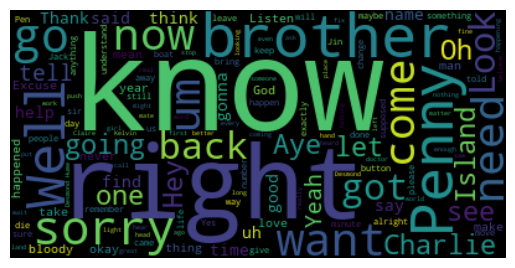

In [63]:
text = " ".join(line for line in desmond_corpus.Words)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
#wordcloud.to_file("desmond_word_cloud.png")

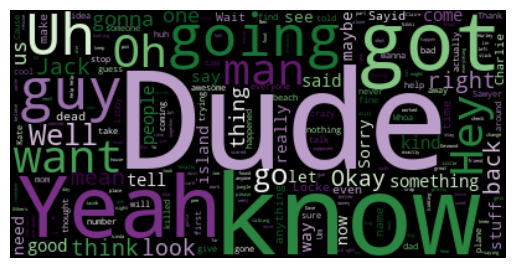

In [81]:
text = " ".join(line for line in hurley_corpus.Words)
wordcloud = WordCloud(colormap='PRGn').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
wordcloud.to_file("hurley_word_cloud.png")

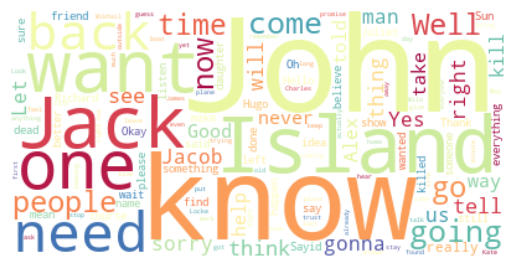

In [83]:
text = " ".join(line for line in ben_corpus.Words)
wordcloud = WordCloud(background_color='white', colormap='Spectral').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [84]:
wordcloud.to_file("ben_word_cloud.png")

# References 
* https://www.datacamp.com/tutorial/wordcloud-python